### DATA SCIENCE INTERN AT BHARAT INTERN
Author: Dewang Shishodia

### TASK 1: Stock Prediction
**Objective:** Take stock of any company and predict its price by using LSTM.

### ABOUT DATASET
Google Stock Prediction
This dataset contains historical data of Google's stock prices and related attributes. It consists of 14 columns and a smaller subset of 1257 rows. Each column represents a specific attribute, and each row contains the corresponding values for that attribute.

The columns in the dataset are as follows:
1. **Symbol:** The name of the company, which is GOOG in this case.
2. **Date:** The year and date of the stock data.
3. **Close:** The closing price of Google's stock on a particular day.
4. **High:** The highest value reached by Google's stock on the given day.
5. **Low:** The lowest value reached by Google's stock on the given day.
6. **Open:** The opening value of Google's stock on the given day.
7. **Volume:** The trading volume of Google's stock on the given day, i.e., the number of shares traded.
8. **adjClose:** The adjusted closing price of Google's stock, considering factors such as dividends and stock splits.
9. **adjHigh:** The adjusted highest value reached by Google's stock on the given day.
10. **adjLow:** The adjusted lowest value reached by Google's stock on the given day.
11. **adjOpen:** The adjusted opening value of Google's stock on the given day.
12. **adjVolume:** The adjusted trading volume of Google's stock on the given day, accounting for factors such as stock splits.
13. **divCash:** The amount of cash dividend paid out to shareholders on the given day.
14. **splitFactor:** The split factor, if any, applied to Google's stock on the given day. A split factor of 1 indicates no split.

The dataset is available at Kaggle : https://www.kaggle.com/datasets/shreenidhihipparagi/google-stock-prediction

### STEP 1: IMPORTING LIBRARIES AND DATA TO BE USED

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')  

from sklearn.preprocessing import MinMaxScaler 
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional

In [2]:
df = pd.read_csv('Google_Stock_Dataset.csv')
df.head(10)

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.47,713.1200,716.48,1306065,718.27,722.47,713.1200,716.48,1306065,0,1
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.98,717.3100,719.00,1214517,718.92,722.98,717.3100,719.00,1214517,0,1
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.65,703.2600,714.91,1982471,710.36,716.65,703.2600,714.91,1982471,0,1
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.82,688.4515,708.65,3402357,691.72,708.82,688.4515,708.65,3402357,0,1
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.48,693.4100,698.77,2082538,693.71,702.48,693.4100,698.77,2082538,0,1
5,GOOG,2016-06-21 00:00:00+00:00,695.94,702.77,692.0100,698.40,1465634,695.94,702.77,692.0100,698.40,1465634,0,1
6,GOOG,2016-06-22 00:00:00+00:00,697.46,700.86,693.0819,699.06,1184318,697.46,700.86,693.0819,699.06,1184318,0,1
7,GOOG,2016-06-23 00:00:00+00:00,701.87,701.95,687.0000,697.45,2171415,701.87,701.95,687.0000,697.45,2171415,0,1
8,GOOG,2016-06-24 00:00:00+00:00,675.22,689.40,673.4500,675.17,4449022,675.22,689.40,673.4500,675.17,4449022,0,1
9,GOOG,2016-06-27 00:00:00+00:00,668.26,672.30,663.2840,671.00,2641085,668.26,672.30,663.2840,671.00,2641085,0,1


### STEP 2: UNDERSTANDING THE DATA

In [3]:
print("Data Shape:",df.shape)

Data Shape: (1258, 14)


In [4]:
df.describe()

,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.0,1258.0
mean,1216.317067,1227.430934,1204.176430,1215.260779,1.601590e+06,1216.317067,1227.430936,1204.176436,1215.260779,1.601590e+06,0.0,1.0
std,383.333358,387.570872,378.777094,382.446995,6.960172e+05,383.333358,387.570873,378.777099,382.446995,6.960172e+05,0.0,0.0
min,668.260000,672.300000,663.284000,671.000000,3.467530e+05,668.260000,672.300000,663.284000,671.000000,3.467530e+05,0.0,1.0
25%,960.802500,968.757500,952.182500,959.005000,1.173522e+06,960.802500,968.757500,952.182500,959.005000,1.173522e+06,0.0,1.0
50%,1132.460000,1143.935000,1117.915000,1131.150000,1.412588e+06,1132.460000,1143.935000,1117.915000,1131.150000,1.412588e+06,0.0,1.0
75%,1360.595000,1374.345000,1348.557500,1361.075000,1.812156e+06,1360.595000,1374.345000,1348.557500,1361.075000,1.812156e+06,0.0,1.0
max,2521.600000,2526.990000,2498.290000,2524.920000,6.207027e+06,2521.600000,2526.990000,2498.290000,2524.920000,6.207027e+06,0.0,1.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       1258 non-null   object 
 1   date         1258 non-null   object 
 2   close        1258 non-null   float64
 3   high         1258 non-null   float64
 4   low          1258 non-null   float64
 5   open         1258 non-null   float64
 6   volume       1258 non-null   int64  
 7   adjClose     1258 non-null   float64
 8   adjHigh      1258 non-null   float64
 9   adjLow       1258 non-null   float64
 10  adjOpen      1258 non-null   float64
 11  adjVolume    1258 non-null   int64  
 12  divCash      1258 non-null   int64  
 13  splitFactor  1258 non-null   int64  
dtypes: float64(8), int64(4), object(2)
memory usage: 137.7+ KB


In [6]:
df.isnull().sum()

symbol         0
date           0
close          0
high           0
low            0
open           0
volume         0
adjClose       0
adjHigh        0
adjLow         0
adjOpen        0
adjVolume      0
divCash        0
splitFactor    0
dtype: int64

#### Data does not contain null values

In [7]:
df = df[['date','open','close']]
df['date'] = pd.to_datetime(df['date'].apply(lambda x: x.split()[0])) 
df.set_index('date',drop=True,inplace=True) 
df.head(10)

,open,close
date,,
2016-06-14,716.48,718.27
2016-06-15,719.00,718.92
2016-06-16,714.91,710.36
2016-06-17,708.65,691.72
2016-06-20,698.77,693.71
2016-06-21,698.40,695.94
2016-06-22,699.06,697.46
2016-06-23,697.45,701.87
2016-06-24,675.17,675.22


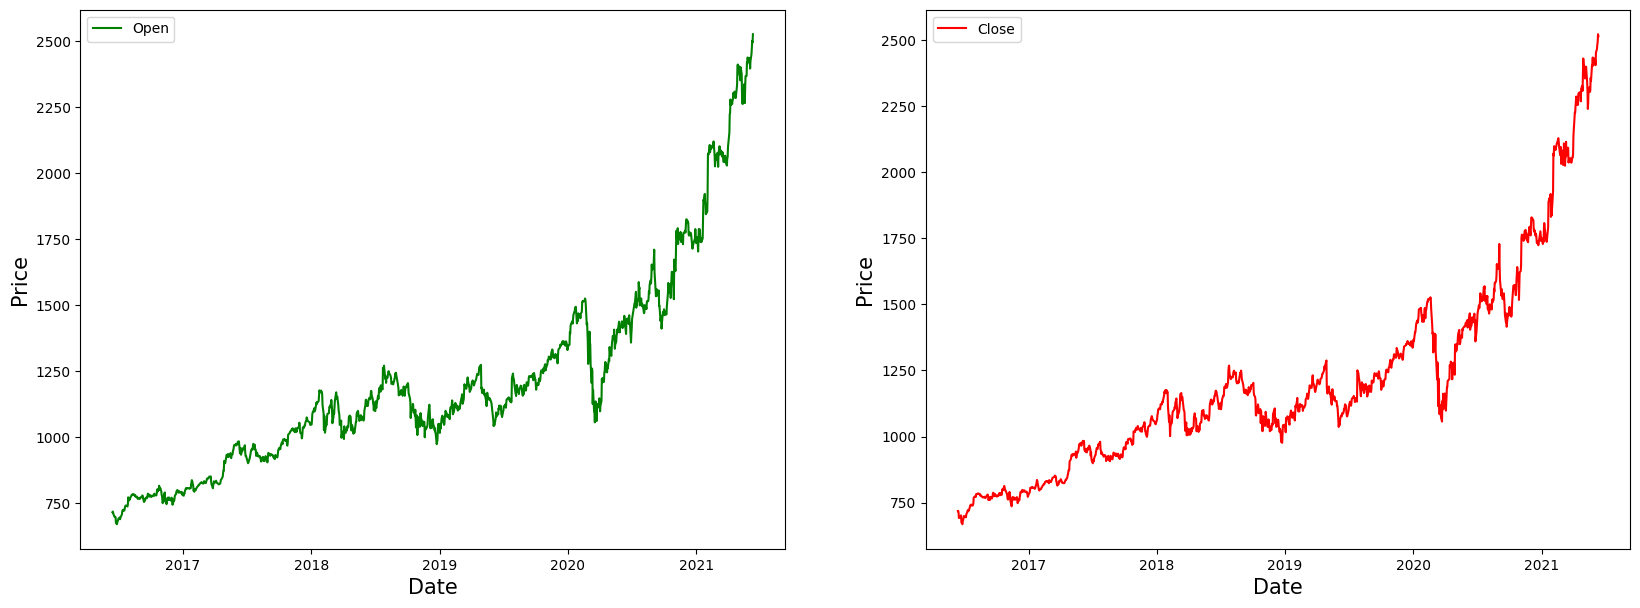

In [8]:
fig, ax =plt.subplots(1,2,figsize=(20,7))
ax[0].plot(df['open'],label='Open',color='green')
ax[0].set_xlabel('Date',size=15)
ax[0].set_ylabel('Price',size=15)
ax[0].legend()

ax[1].plot(df['close'],label='Close',color='red')
ax[1].set_xlabel('Date',size=15)
ax[1].set_ylabel('Price',size=15)
ax[1].legend()

fig.show()

### STEP 3: DATA PRE-PROCESSING

In [9]:
MMS = MinMaxScaler()
df[df.columns] = MMS.fit_transform(df)
df.head(10)

,open,close
date,,
2016-06-14,0.024532,0.026984
2016-06-15,0.025891,0.027334
2016-06-16,0.023685,0.022716
2016-06-17,0.020308,0.012658
2016-06-20,0.014979,0.013732
2016-06-21,0.014779,0.014935
2016-06-22,0.015135,0.015755
2016-06-23,0.014267,0.018135
2016-06-24,0.002249,0.003755


In [23]:
training_size = round(len(df) * 0.75) 
training_size

944

In [24]:
train_data = df[:training_size]
test_data  = df[training_size:]

train_data.shape, test_data.shape

((944, 2), (314, 2))

In [25]:
def create_sequence(dataset):
    sequences = []
    labels = []

    start_idx = 0

    for stop_idx in range(50,len(dataset)): 
        sequences.append(dataset.iloc[start_idx:stop_idx])
        labels.append(dataset.iloc[stop_idx])
        start_idx += 1
    return (np.array(sequences),np.array(labels))

In [26]:
train_seq, train_label = create_sequence(train_data) 
test_seq, test_label = create_sequence(test_data)
train_seq.shape, train_label.shape, test_seq.shape, test_label.shape

((894, 50, 2), (894, 2), (264, 50, 2), (264, 2))

### STEP 4: CREATING LSTM MODEL

In [27]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape = (train_seq.shape[1], train_seq.shape[2])))
model.add(Dropout(0.1)) 
model.add(LSTM(units=50))
model.add(Dense(2))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 50, 50)            10600     
                                                                 
 dropout_1 (Dropout)         (None, 50, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 2)                 102       
                                                                 
Total params: 30,902
Trainable params: 30,902
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.fit(train_seq, train_label, epochs=100,validation_data=(test_seq, test_label), verbose=1)

Epoch 1/100
28/28 [==============================] - 21s 202ms/step - loss: 0.0096 - mean_absolute_error: 0.0714 - val_loss: 0.0262 - val_mean_absolute_error: 0.1324
Epoch 2/100
28/28 [==============================] - 3s 102ms/step - loss: 8.9825e-04 - mean_absolute_error: 0.0237 - val_loss: 0.0051 - val_mean_absolute_error: 0.0557
Epoch 3/100
28/28 [==============================] - 3s 90ms/step - loss: 5.3952e-04 - mean_absolute_error: 0.0172 - val_loss: 0.0020 - val_mean_absolute_error: 0.0343
Epoch 4/100
28/28 [==============================] - 3s 97ms/step - loss: 4.4290e-04 - mean_absolute_error: 0.0154 - val_loss: 0.0035 - val_mean_absolute_error: 0.0456
Epoch 5/100
28/28 [==============================] - 2s 89ms/step - loss: 4.3433e-04 - mean_absolute_error: 0.0151 - val_loss: 0.0057 - val_mean_absolute_error: 0.0613
Epoch 6/100
28/28 [==============================] - 2s 82ms/step - loss: 4.3916e-04 - mean_absolute_error: 0.0157 - val_loss: 0.0029 - val_mean_absolute_error: 

In [29]:
test_predicted = model.predict(test_seq)
test_predicted[:5]

9/9 [==============================] - 5s 44ms/step


array([[0.40080142, 0.40942147],
       [0.40085256, 0.40982857],
       [0.39745134, 0.40678042],
       [0.39924592, 0.4086364 ],
       [0.40229237, 0.4116967 ]], dtype=float32)

In [30]:
test_inverse_predicted = MMS.inverse_transform(test_predicted)
test_inverse_predicted[:5]

array([[1414.0538, 1427.0571],
       [1414.1486, 1427.8116],
       [1407.843 , 1422.1625],
       [1411.17  , 1425.6022],
       [1416.8179, 1431.2739]], dtype=float32)

### STEP 5: VISUALIZING ACTUAL VS PREDICTED DATA

In [31]:
df_merge = pd.concat([df.iloc[-264:].copy(),
                          pd.DataFrame(test_inverse_predicted,columns=['open_predicted','close_predicted'],
                                       index=df.iloc[-264:].index)], axis=1)

In [32]:
df_merge[['open','close']] = MMS.inverse_transform(df_merge[['open','close']])
df_merge.head()

,open,close,open_predicted,close_predicted
date,,,,
2020-05-27,1417.25,1417.84,1414.053833,1427.057129
2020-05-28,1396.86,1416.73,1414.148560,1427.811646
2020-05-29,1416.94,1428.92,1407.843018,1422.162476
2020-06-01,1418.39,1431.82,1411.170044,1425.602173
2020-06-02,1430.55,1439.22,1416.817871,1431.273926


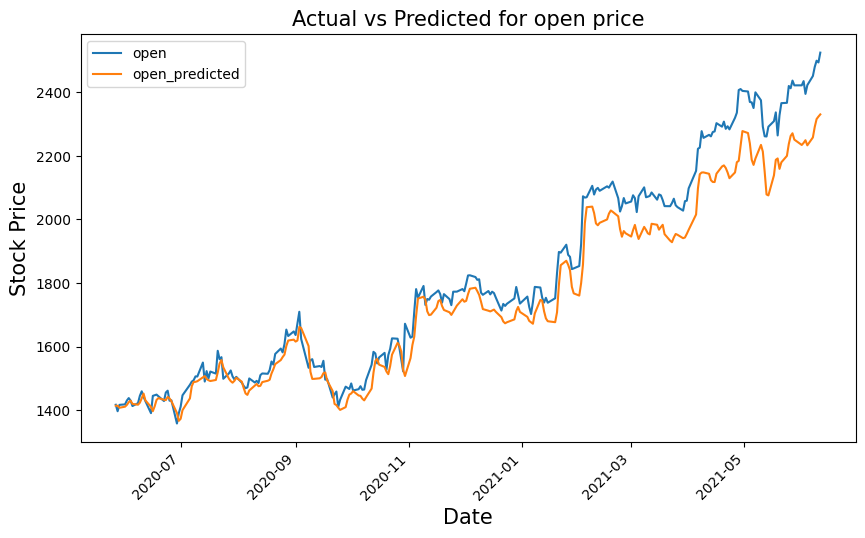

In [33]:
df_merge[['open','open_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for open price',size=15)
plt.show()

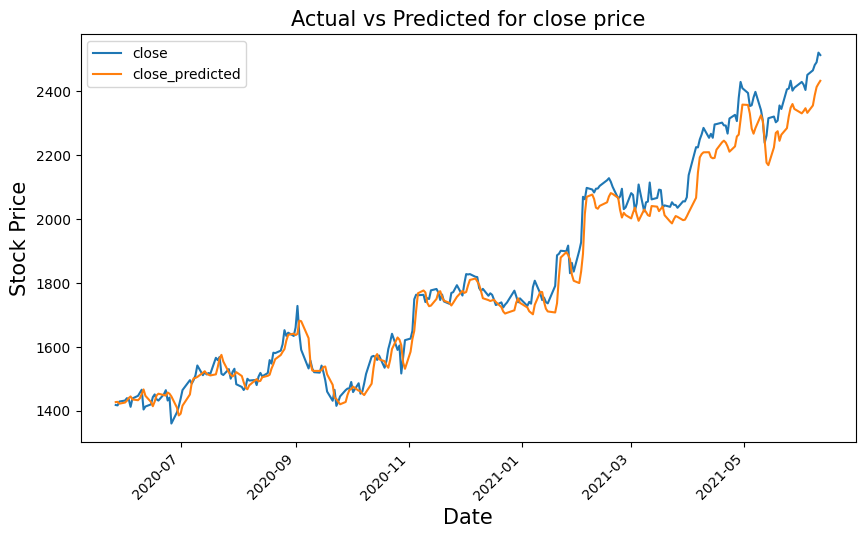

In [34]:
df_merge[['close','close_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for close price',size=15)
plt.show()

### STEP 6: PREDICT NEXT 10 DAYS

In [35]:
df_merge = df_merge.append(pd.DataFrame(columns=df_merge.columns,
                                        index=pd.date_range(start=df_merge.index[-1], periods=11, freq='D', closed='right')))
df_merge['2021-06-09':'2021-06-16']

,open,close,open_predicted,close_predicted
2021-06-09,2499.50,2491.40,2315.951416,2413.739746
2021-06-10,2494.01,2521.60,2323.757812,2424.104980
2021-06-11,2524.92,2513.93,2330.593262,2433.276611
2021-06-12,NaN,NaN,NaN,NaN
2021-06-13,NaN,NaN,NaN,NaN
2021-06-14,NaN,NaN,NaN,NaN
2021-06-15,NaN,NaN,NaN,NaN
2021-06-16,NaN,NaN,NaN,NaN


In [36]:
upcoming_prediction = pd.DataFrame(columns=['open','close'],index=df_merge.index)
upcoming_prediction.index=pd.to_datetime(upcoming_prediction.index)

In [37]:
curr_seq = test_seq[-1:]

for i in range(-10,0):
  up_pred = model.predict(curr_seq)
  upcoming_prediction.iloc[i] = up_pred
  curr_seq = np.append(curr_seq[0][1:],up_pred,axis=0)
  curr_seq = curr_seq.reshape(test_seq[-1:].shape)

1/1 [==============================] - 0s 76ms/step


In [38]:
upcoming_prediction[['open','close']] = MMS.inverse_transform(upcoming_prediction[['open','close']])

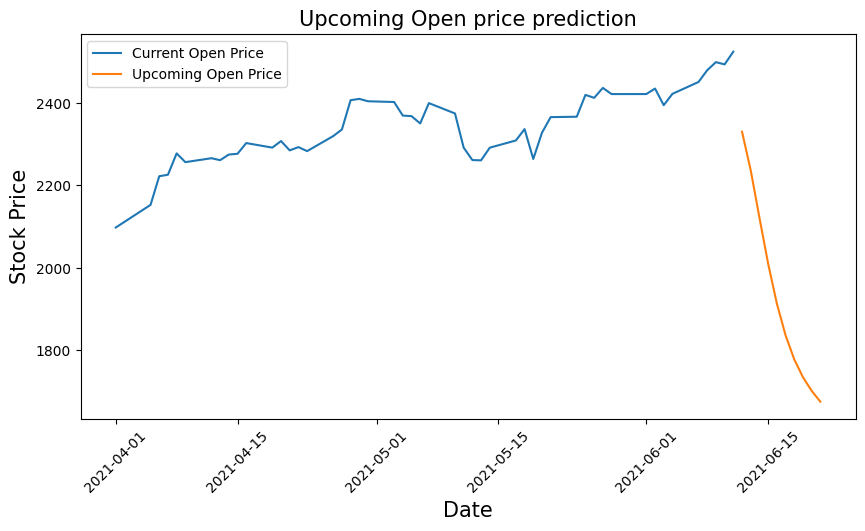

In [39]:
fig,ax=plt.subplots(figsize=(10,5))
ax.plot(df_merge.loc['2021-04-01':,'open'],label='Current Open Price')
ax.plot(upcoming_prediction.loc['2021-04-01':,'open'],label='Upcoming Open Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Stock Price',size=15)
ax.set_title('Upcoming Open price prediction',size=15)
ax.legend()
fig.show()

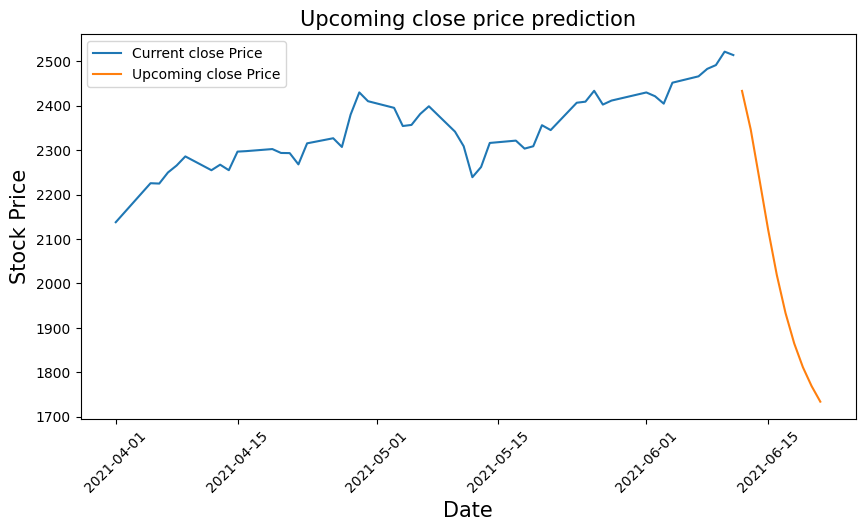

In [40]:
fig,ax=plt.subplots(figsize=(10,5))
ax.plot(df_merge.loc['2021-04-01':,'close'],label='Current close Price')
ax.plot(upcoming_prediction.loc['2021-04-01':,'close'],label='Upcoming close Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Stock Price',size=15)
ax.set_title('Upcoming close price prediction',size=15)
ax.legend()
fig.show()

### THANK YOU!